In [2]:
import json
import numpy as np
width = 240
height = 180



43200


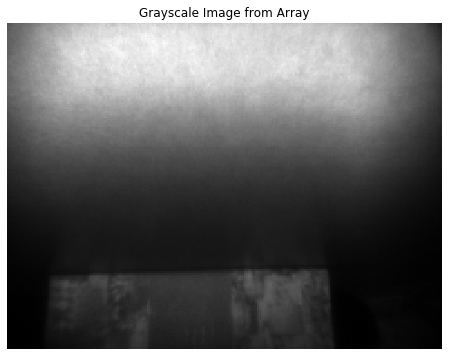

In [10]:
import numpy as np
import matplotlib.pyplot as plt

with open('../../data/confidence1.json', 'r') as file:
    data = json.load(file)
print(len(data))

# Create a sample NumPy array representing an image
# For example, a grayscale image (2D array)
#grayscale_image_array = np.random.randint(0, 256, size=(100, 150), dtype=np.uint8)
grayscale_image_array = np.array(data).reshape(height,width)

plt.subplots(figsize=(8, 6))
plt.imshow(grayscale_image_array, cmap='gray') # 'gray' colormap is good for grayscale
plt.title("Grayscale Image from Array")
plt.axis('off') # Turn off axis labels and ticks

plt.show() # Display the plots

43200
0 1937.17


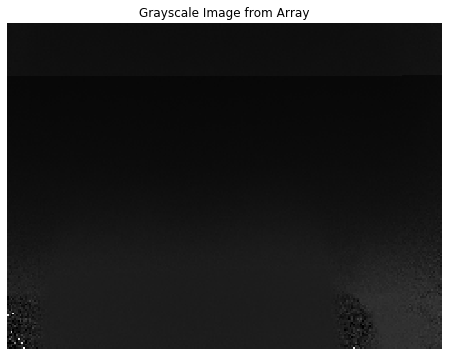

In [45]:
import numpy as np
import matplotlib.pyplot as plt

with open('../../data/depth1.json', 'r') as file:
    data = json.load(file)
print(len(data))

vmin = 10000000000000
vmax = -10000000000000
for v in data:
    if v > vmax:
        vmax = v
    if v < vmin:
        vmin = v
print(vmin, vmax)

#for i in range(len(data)):
#    data[i] = (data[i] - vmin) * 255 / (vmax-vmin)

grayscale_image_array = np.array(data).reshape(height,width)

plt.subplots(figsize=(8, 6))
plt.imshow(grayscale_image_array, cmap='gray') # 'gray' colormap is good for grayscale
plt.title("Grayscale Image from Array")
plt.axis('off') # Turn off axis labels and ticks

plt.show() # Display the plots

172800
-5936 6064


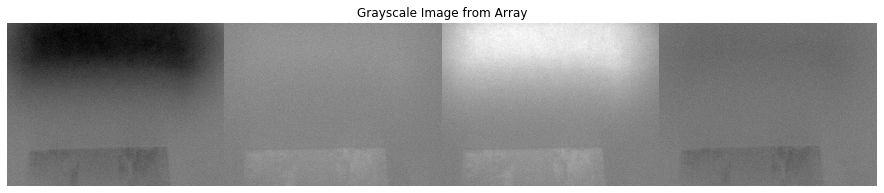

In [23]:
import numpy as np
import matplotlib.pyplot as plt

with open('../../data/raw1.json', 'r') as file:
    rdata = json.load(file)
print(len(rdata))

vmin = 10000000000000
vmax = -10000000000000
for v in rdata:
    if v > vmax:
        vmax = v
    if v < vmin:
        vmin = v
print(vmin, vmax)


grayscale_image_array = np.array(rdata).reshape(height,width*4)

plt.subplots(figsize=(16, 3))
plt.imshow(grayscale_image_array, cmap='gray') # 'gray' colormap is good for grayscale
plt.title("Grayscale Image from Array")
plt.axis('off') # Turn off axis labels and ticks

plt.show() # Display the plots

172800


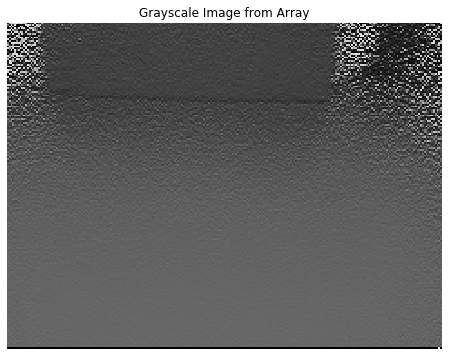

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

with open('../../data/raw1.json', 'r') as file:
    rdata = json.load(file)
print(len(rdata))

result = np.zeros((height,width), dtype=float)

c= 299792458
f = 12000000

for y in range(height):
    for x in range(width):
        DCS0 = rdata[y * width * 4 + x]
        DCS1 = rdata[y * width * 4 + x + width]
        DCS2 = rdata[y * width * 4 + x + width * 2]
        DCS3 = rdata[y * width * 4 + x + width * 3]
        #result[height - y -1,x] = c * (1 + atan2(DCS3 - DCS1, DCS2 - DCS0)/ pi) / (4 * f)
        result[height - y -1,x] = atan2(DCS3 - DCS1, DCS2 - DCS0)

plt.subplots(figsize=(8, 6))
plt.imshow(result, cmap='gray') # 'gray' colormap is good for grayscale
plt.title("Grayscale Image from Array")
plt.axis('off') # Turn off axis labels and ticks

plt.show() # Display the plots

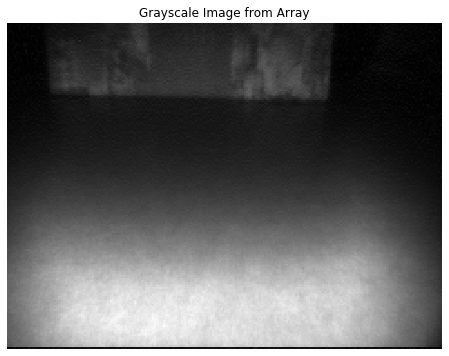

In [4]:
amplitudes = np.zeros((height,width), dtype=float)

for y in range(height):
    for x in range(width):
        DCS0 = rdata[y * width * 4 + x]
        DCS1 = rdata[y * width * 4 + x + width]
        DCS2 = rdata[y * width * 4 + x + width * 2]
        DCS3 = rdata[y * width * 4 + x + width * 3]
        #result[height - y -1,x] = c * (1 + atan2(DCS3 - DCS1, DCS2 - DCS0)/ pi) / (4 * f)
        amplitudes[height - y -1,x] = sqrt((DCS3 - DCS1)**2 + (DCS2 - DCS0)**2) / 2

plt.subplots(figsize=(8, 6))
plt.imshow(amplitudes, cmap='gray') # 'gray' colormap is good for grayscale
plt.title("Grayscale Image from Array")
plt.axis('off') # Turn off axis labels and ticks

plt.show() # Display the plots

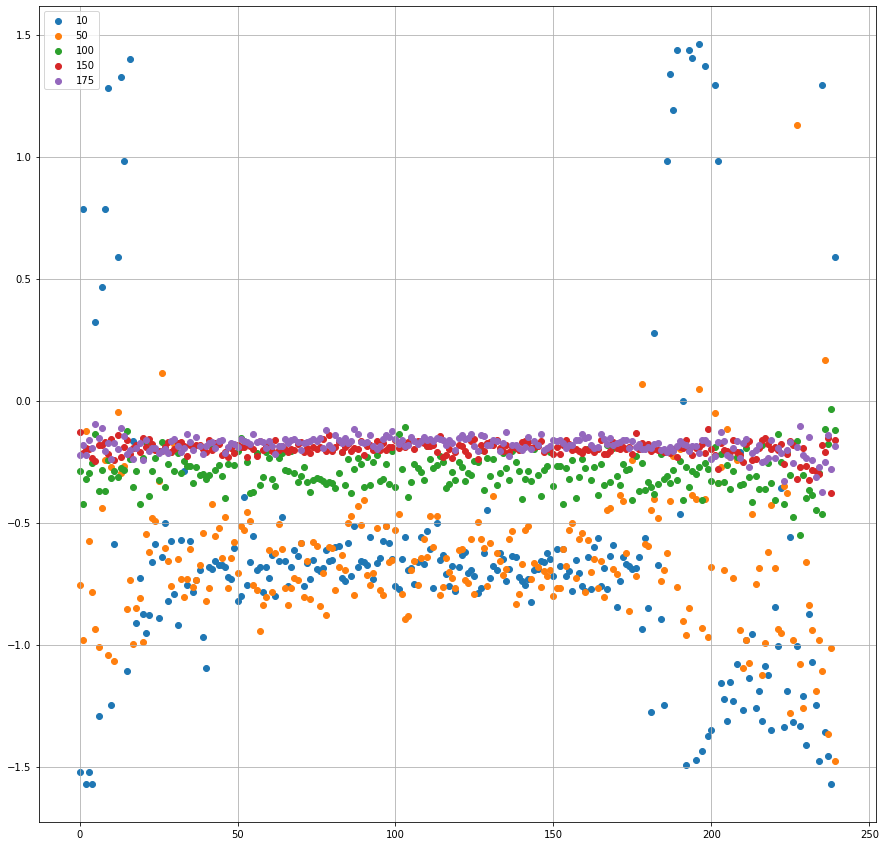

In [54]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

x = range(width)

ax.scatter(x, [result[10,i] for i in x], label=f"{10}")
ax.scatter(x, [result[50,i] for i in x], label=f"{50}")
ax.scatter(x, [result[100,i] for i in x], label=f"{100}")
ax.scatter(x, [result[150,i] for i in x], label=f"{150}")
ax.scatter(x, [result[175,i] for i in x], label=f"{175}")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

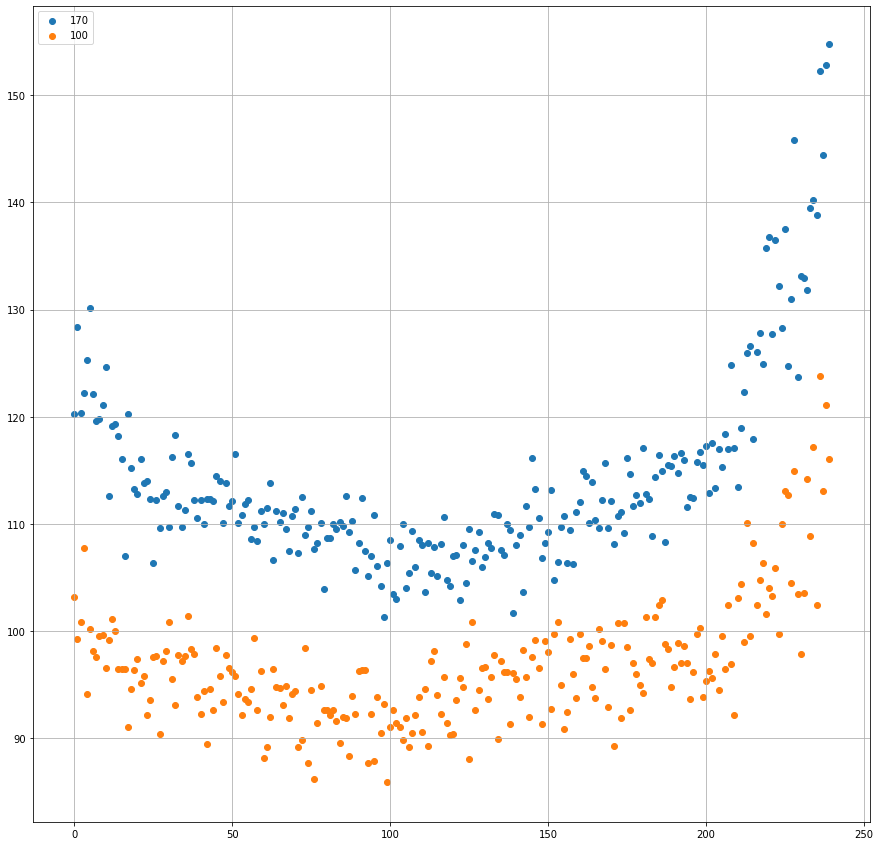

In [55]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

x = range(width)

ax.scatter(x, [grayscale_image_array[height-1 - 170,i] for i in x], label=f"{170}")
ax.scatter(x, [grayscale_image_array[height-1 - 100,i] for i in x], label=f"{100}")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

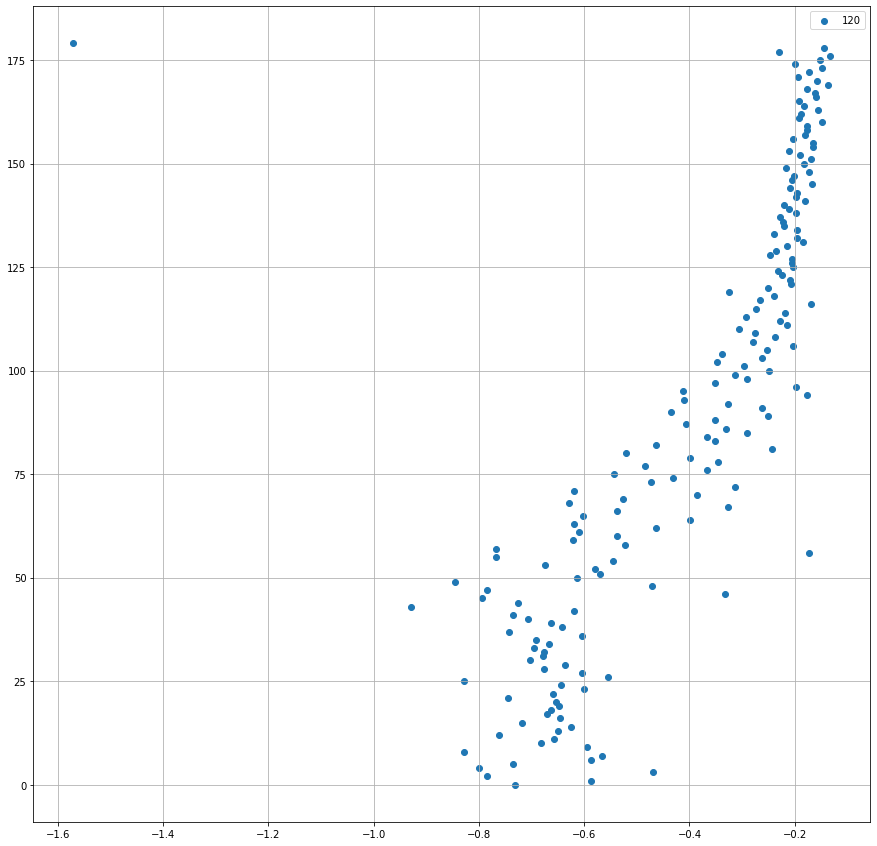

In [56]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

y = range(height)

ax.scatter([result[i,120] for i in y], y, label=f"{120}")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

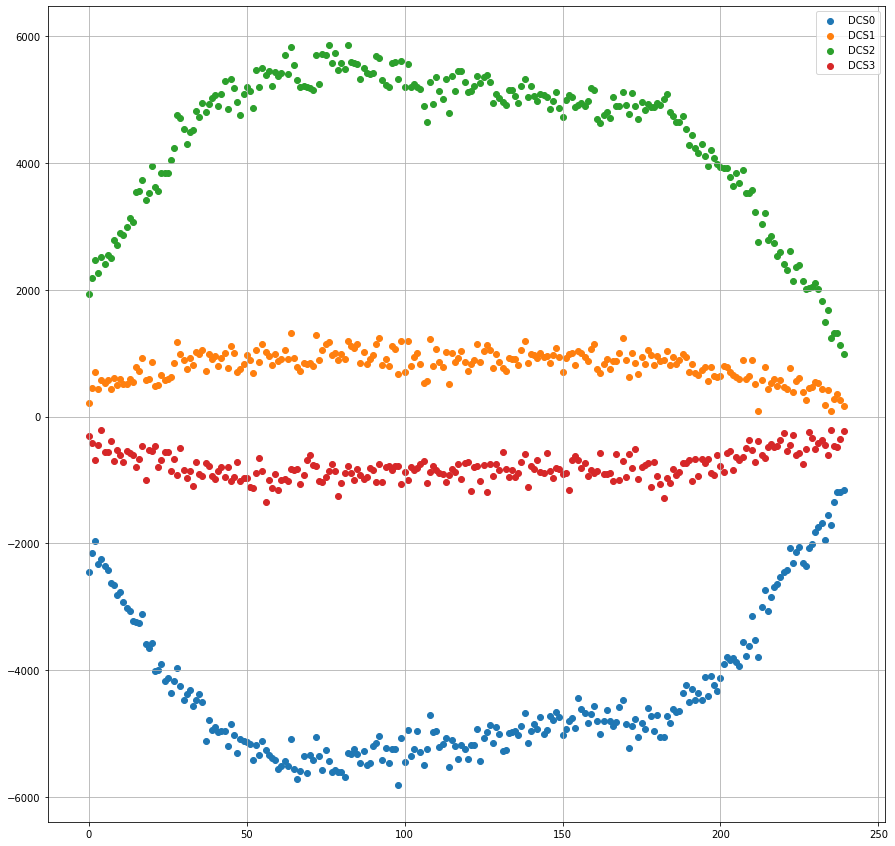

In [59]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

y = 10
x = range(width)

DCS0 = []
DCS1 = []
DCS2 = []
DCS3 = []

for xi in x:
    DCS0.append(rdata[y * width * 4 + xi])
    DCS1.append(rdata[y * width * 4 + xi + width])
    DCS2.append(rdata[y * width * 4 + xi + width * 2])
    DCS3.append(rdata[y * width * 4 + xi + width * 3])
    #result[height - y -1,x] = c * (1 + atan2(DCS3 - DCS1, DCS2 - DCS0)/ pi) / (4 * f)
    #result[height - y -1,x] = atan2(DCS3 - DCS1, DCS2 - DCS0)

ax.scatter(x, DCS0, label=f"DCS0")
ax.scatter(x, DCS1, label=f"DCS1")
ax.scatter(x, DCS2, label=f"DCS2")
ax.scatter(x, DCS3, label=f"DCS3")
    
        
ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

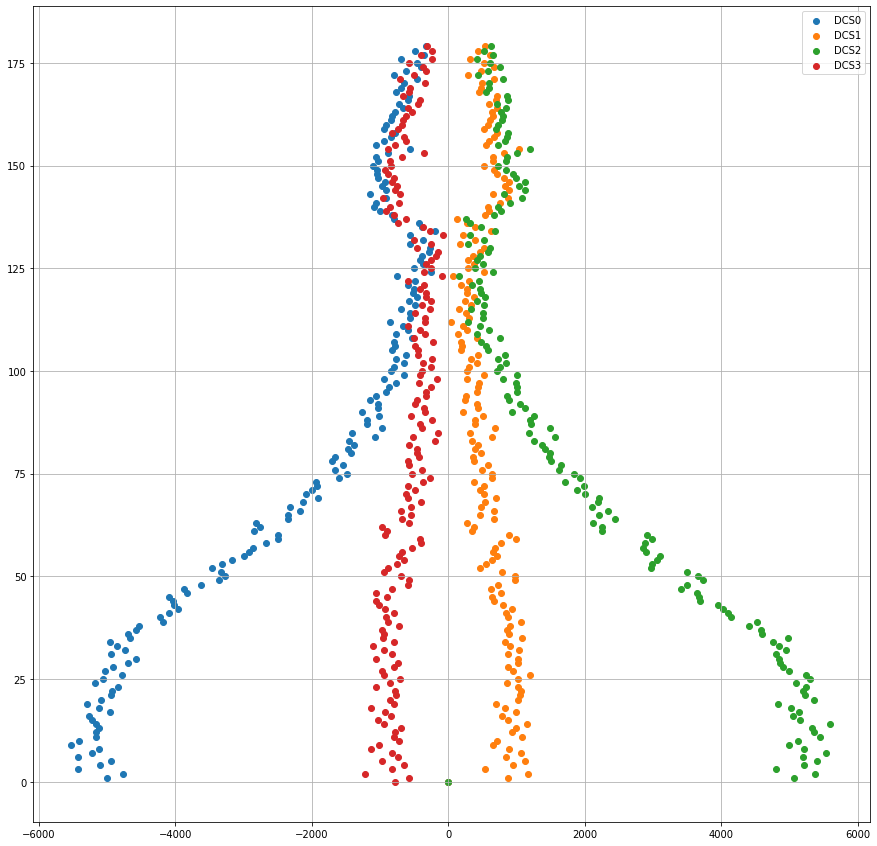

In [60]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

y = range(height)
x = 120

DCS0 = []
DCS1 = []
DCS2 = []
DCS3 = []

for yi in y:
    DCS0.append(rdata[yi * width * 4 + x])
    DCS1.append(rdata[yi * width * 4 + x + width])
    DCS2.append(rdata[yi * width * 4 + x + width * 2])
    DCS3.append(rdata[yi * width * 4 + x + width * 3])
    #result[height - y -1,x] = c * (1 + atan2(DCS3 - DCS1, DCS2 - DCS0)/ pi) / (4 * f)
    #result[height - y -1,x] = atan2(DCS3 - DCS1, DCS2 - DCS0)

ax.scatter(DCS0, y, label=f"DCS0")
ax.scatter(DCS1, y, label=f"DCS1")
ax.scatter(DCS2, y, label=f"DCS2")
ax.scatter(DCS3, y, label=f"DCS3")
    
        
ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

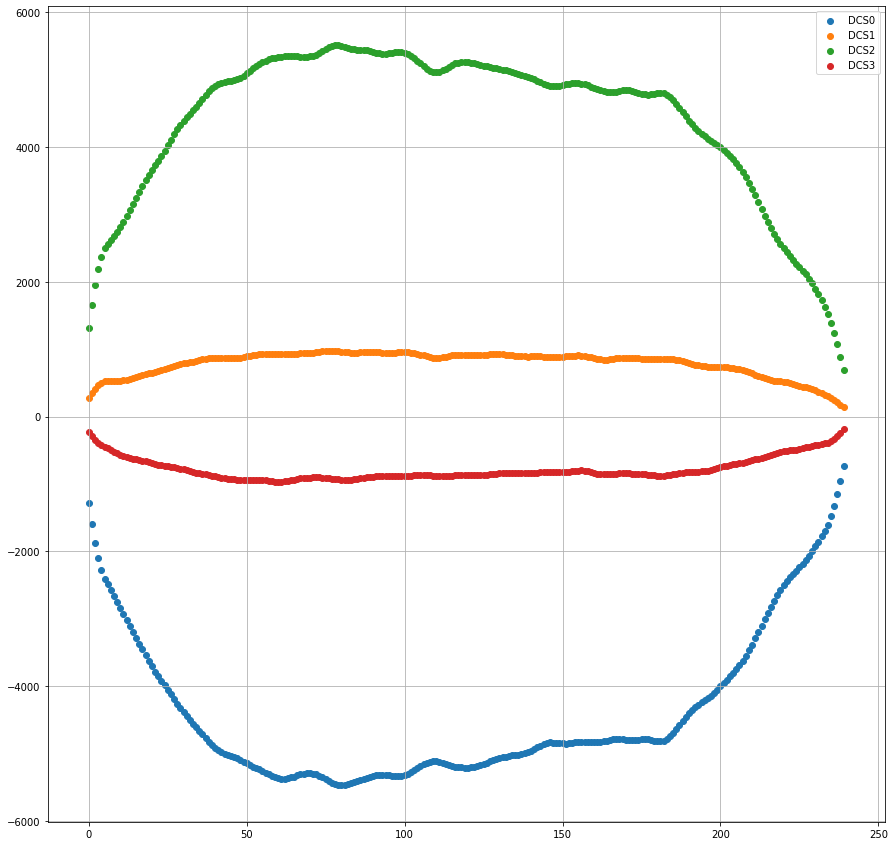

In [5]:
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from math import *

plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

def gaussian_kernel_2d(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*pi*sigma**2)) * np.exp(
            (-1*((x-(size-1)/2)**2 + (y-(size-1)/2)**2))/(2*sigma**2)
        ),
        (size, size)
    )
    return kernel / np.sum(kernel)

with open('../../data/raw1.json', 'r') as file:
    rdata = json.load(file)

imgs = [np.zeros((height,width), dtype=int),
        np.zeros((height,width), dtype=int),
        np.zeros((height,width), dtype=int),
        np.zeros((height,width), dtype=int)]

for xi in range(width):
    for yi in range(height):
        for i in range(4):
            imgs[i][yi,xi] = rdata[yi * width * 4 + xi + width * i]

            
# Create a 2D Gaussian kernel
kernel_size = 11
sigma = 3
gaussian_kern = gaussian_kernel_2d(kernel_size, sigma)

#print(gaussian_kern)

filtered_image = []
            
for i in range(4):
    #filtered_image.append(gaussian_filter(imgs[i], sigma=3))
    filtered_image.append(convolve2d(imgs[i], gaussian_kern, mode='same'))
            
y = 10
x = range(width)

DCS = [[],[],[],[]]

for xi in x:
    for i in range(4):
        DCS[i].append(filtered_image[i][y,xi])

for i in range(4):
    ax.scatter(x, DCS[i], label=f"DCS{i}")
    
        
ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

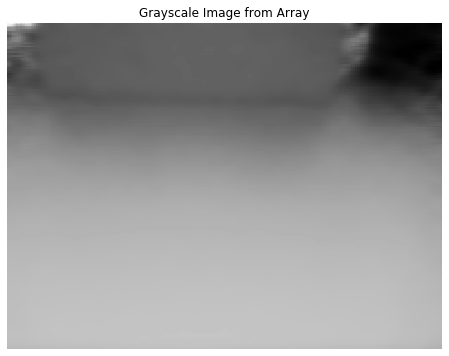

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

result2 = np.zeros((height,width), dtype=float)

for y in range(height):
    for x in range(width):
        #result[height - y -1,x] = c * (1 + atan2(DCS3 - DCS1, DCS2 - DCS0)/ pi) / (4 * f)
        result2[height - y -1,x] = atan2(filtered_image[3][y,x] - filtered_image[1][y,x], filtered_image[2][y,x] - filtered_image[0][y,x])

plt.subplots(figsize=(8, 6))
plt.imshow(result2, cmap='gray') # 'gray' colormap is good for grayscale
plt.title("Grayscale Image from Array")
plt.axis('off') # Turn off axis labels and ticks

plt.show() # Display the plots

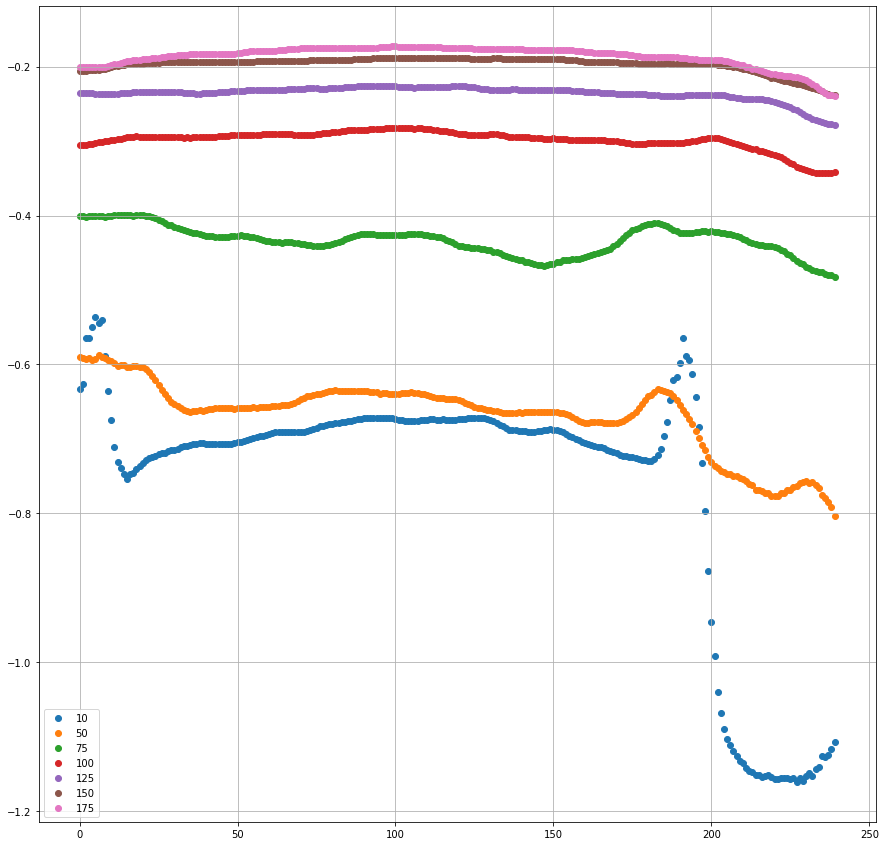

In [88]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

x = range(width)

ax.scatter(x, [result2[10,i] for i in x], label=f"{10}")
ax.scatter(x, [result2[50,i] for i in x], label=f"{50}")
ax.scatter(x, [result2[75,i] for i in x], label=f"{75}")
ax.scatter(x, [result2[100,i] for i in x], label=f"{100}")
ax.scatter(x, [result2[125,i] for i in x], label=f"{125}")
ax.scatter(x, [result2[150,i] for i in x], label=f"{150}")
ax.scatter(x, [result2[175,i] for i in x], label=f"{175}")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

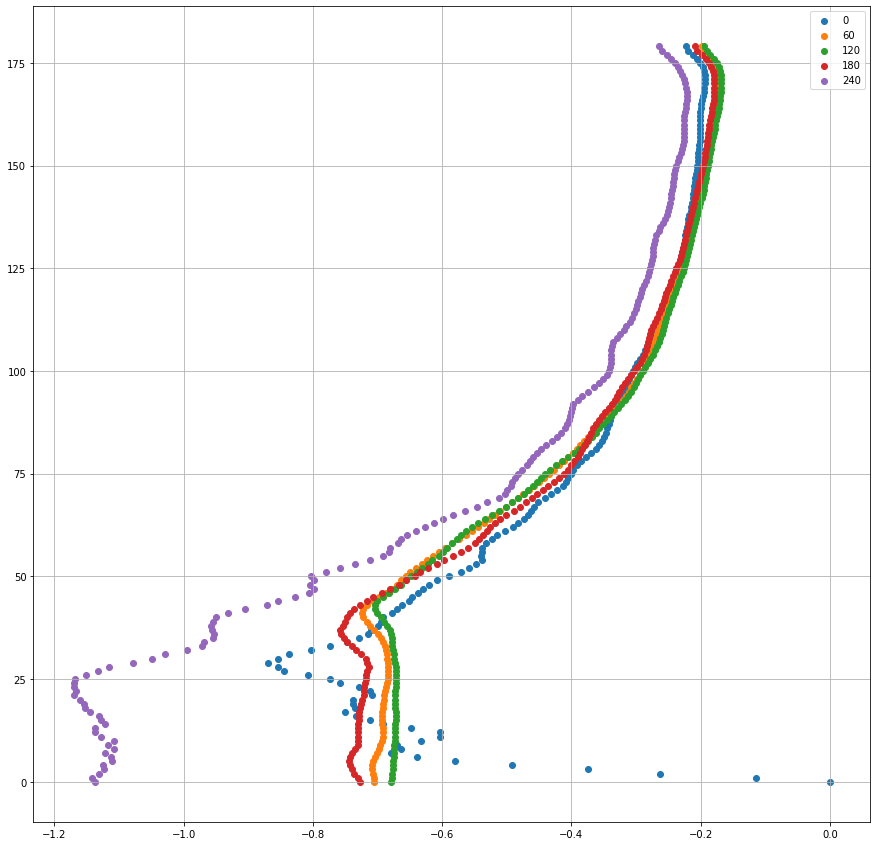

In [89]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

y = range(height)

ax.scatter([result2[i,0] for i in y], y, label=f"{0}")
ax.scatter([result2[i,60] for i in y], y, label=f"{60}")
ax.scatter([result2[i,120] for i in y], y, label=f"{120}")
ax.scatter([result2[i,180] for i in y], y, label=f"{180}")
ax.scatter([result2[i,239] for i in y], y, label=f"{240}")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()

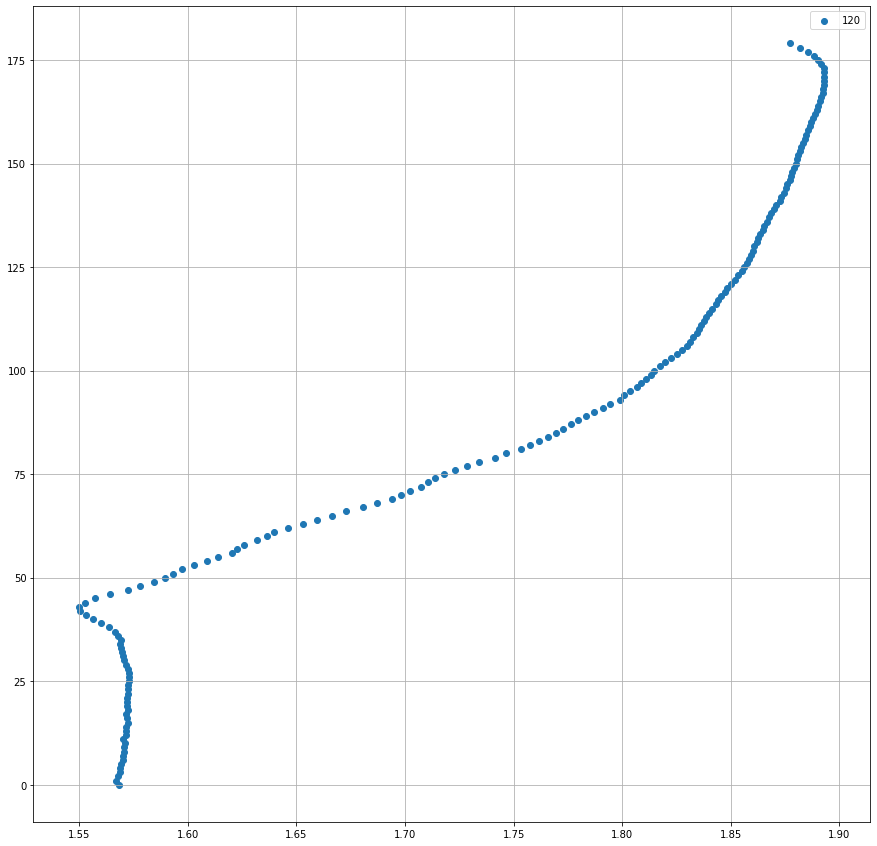

In [8]:
import matplotlib.pyplot as plt
from math import *
plt.rcParams["figure.figsize"] = (15,15)
fig, ax = plt.subplots()

y = range(height)

H = 100
A0 = 0
A1 = 60

c = 3e8
f = 375e5


K = c / (4 * pi * f)
B = pi * K

ax.scatter([result2[i,120] * K + B for i in y], y, label=f"{120}")
#ax.scatter([],y, lable="measurement")

ax.grid(True)
ax.legend()
#ax.set_ylim(150,700)
#ax.set_xlim(0,80)
    
plt.show()